  Stage  WWTP Location  Fine (<0.2 mm)  Medium (0.2−1 mm)  Coarse (>1 mm)
0     I              3              15                 45              40
1     I              4              20                 45              35
2    II              1              20                 40              40
3    II              2              20                 40              40
4    II              3              25                 40              35 

Summary statistics:
                         mean  median       std
Fine (<0.2 mm)     23.928571    20.0  6.256864
Medium (0.2−1 mm)  43.928571    45.0  3.496466
Coarse (>1 mm)     32.142857    35.0  8.254203
WWTP Location       2.642857     3.0  1.150728 



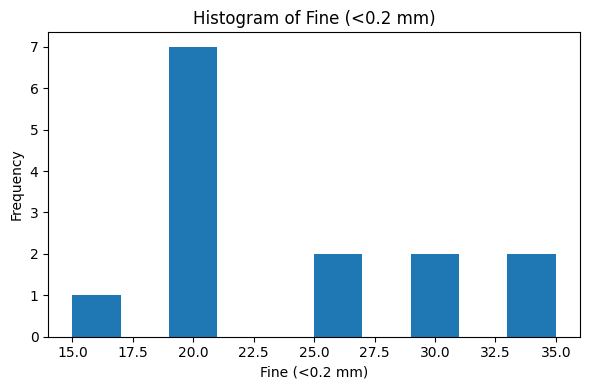

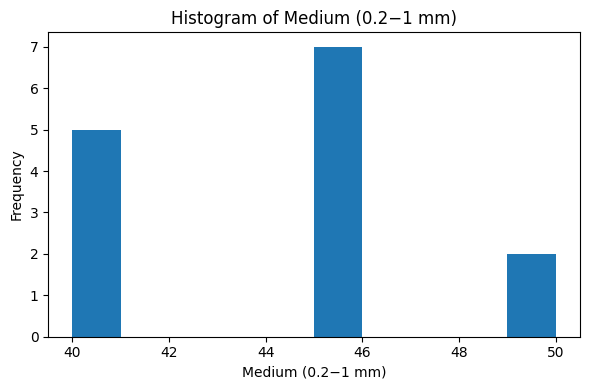

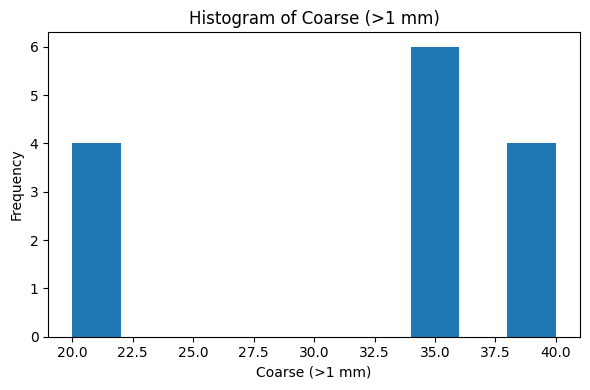

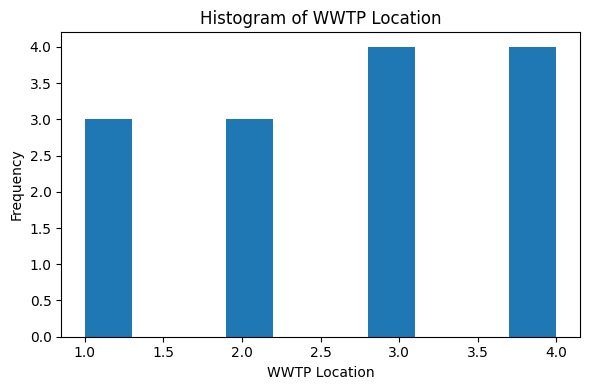

Pearson correlation matrix:
                    Fine (<0.2 mm)  Medium (0.2−1 mm)  Coarse (>1 mm)
Fine (<0.2 mm)           1.000000           0.383012       -0.920265
Medium (0.2−1 mm)        0.383012           1.000000       -0.713930
Coarse (>1 mm)          -0.920265          -0.713930        1.000000 

Spearman correlation matrix:
                    Fine (<0.2 mm)  Medium (0.2−1 mm)  Coarse (>1 mm)
Fine (<0.2 mm)           1.000000           0.294653       -0.854282
Medium (0.2−1 mm)        0.294653           1.000000       -0.694365
Coarse (>1 mm)          -0.854282          -0.694365        1.000000 



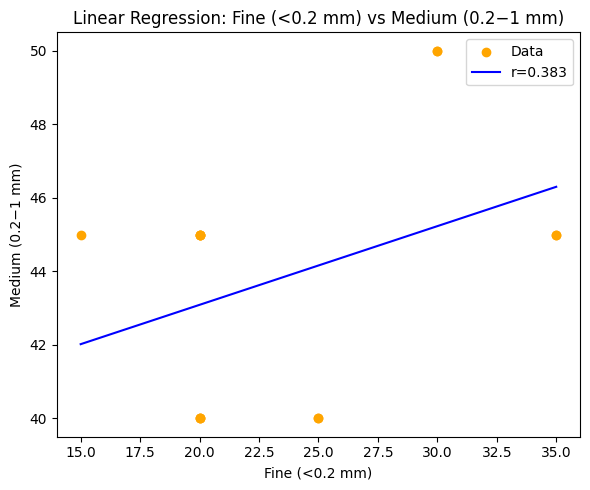

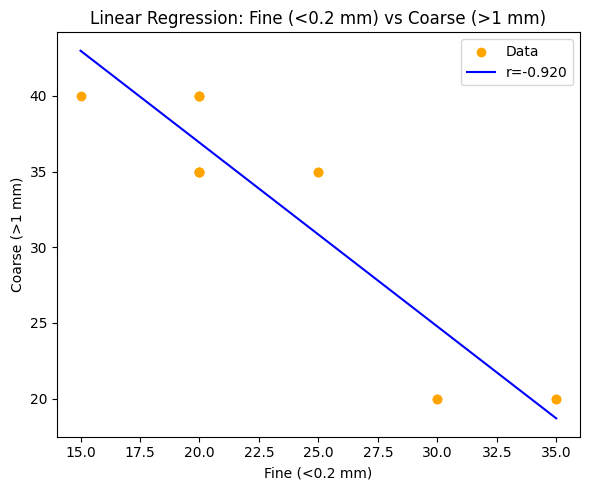

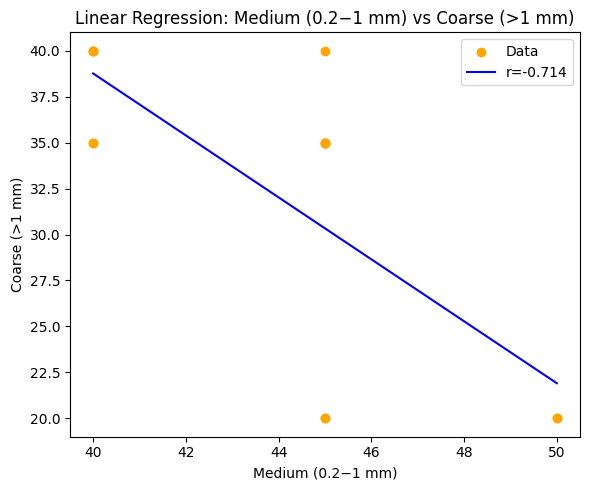

PCA Loadings:
                         PC1       PC2
Fine (<0.2 mm)     0.575535 -0.584100
Medium (0.2−1 mm)  0.499204  0.805293
Coarse (>1 mm)    -0.647730  0.101640 



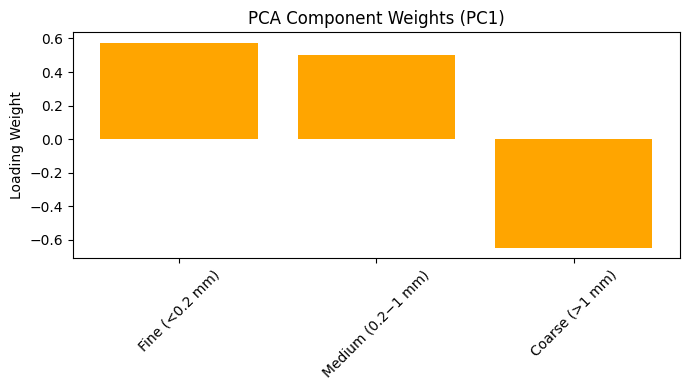

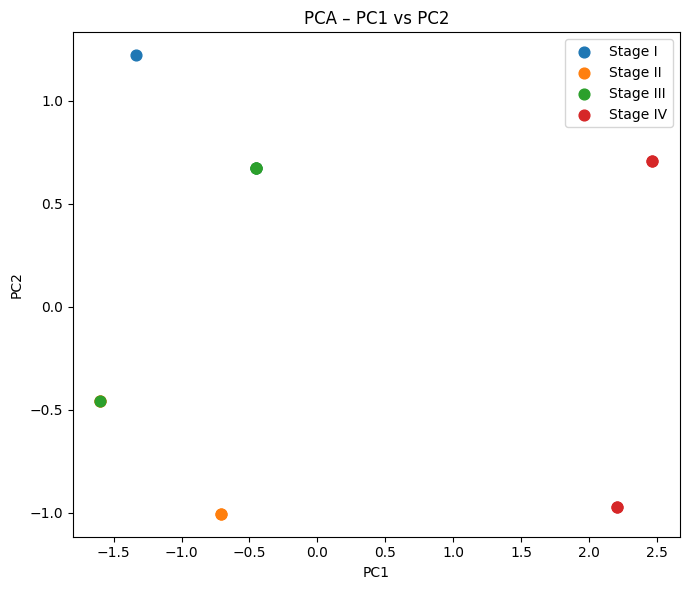

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, linregress
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

file_path = "size distribution.csv"
df = pd.read_csv(file_path)

# Convert percent-like columns to numeric
percent_cols = ["Fine (<0.2 mm)", "Medium (0.2−1 mm)", "Coarse (>1 mm)"]
for col in percent_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace("%", "", regex=False)
        .str.replace(r"[^0-9.\-]", "", regex=True))
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["Stage"] = df["Stage"].astype("category")

print(df.head(), "\n")


# Statistics
numeric_cols = percent_cols + ["WWTP Location"]

summary_stats = df[numeric_cols].agg(["mean", "median", "std"]).T
print("Summary statistics:\n", summary_stats, "\n")

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Correlations
pearson_corr = df[percent_cols].corr(method="pearson")
spearman_corr = df[percent_cols].corr(method="spearman")

print("Pearson correlation matrix:\n", pearson_corr, "\n")
print("Spearman correlation matrix:\n", spearman_corr, "\n")


# Linear regressions
pairs = [
    ("Fine (<0.2 mm)", "Medium (0.2−1 mm)"),
    ("Fine (<0.2 mm)", "Coarse (>1 mm)"),
    ("Medium (0.2−1 mm)", "Coarse (>1 mm)")]

for xvar, yvar in pairs:
    clean = df[[xvar, yvar]].dropna()
    x = clean[xvar]
    y = clean[yvar]

    lr = linregress(x, y)

    plt.figure(figsize=(6,5))
    plt.scatter(x, y, label="Data", color="orange")
    
    xs = np.linspace(x.min(), x.max(), 100)
    plt.plot(xs, lr.slope*xs + lr.intercept, label=f"r={lr.rvalue:.3f}", color="blue")

    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.title(f"Linear Regression: {xvar} vs {yvar}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 6. PCA
X = df[percent_cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(
    pca.components_.T,
    index=percent_cols,
    columns=["PC1", "PC2"])

print("PCA Loadings:\n", loadings, "\n")

# Bar chart of PC1
plt.figure(figsize=(7,4))
plt.bar(loadings.index, loadings["PC1"], color="orange")
plt.title("PCA Component Weights (PC1)")
plt.ylabel("Loading Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PCA Scatterplot
# Color coded by stage
stage_labels = df.loc[X.index, "Stage"]

plt.figure(figsize=(7,6))
for s in stage_labels.unique():
    mask = stage_labels == s
    plt.scatter(pcs[mask, 0], pcs[mask, 1], label=f"Stage {s}", s=60)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – PC1 vs PC2")
plt.legend()
plt.tight_layout()
plt.show()